<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/heart_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn')

<ipython-input-77-89c5de880dcf>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Import Data

In [ ]:
hrt_url = 'https://raw.githubusercontent.com/bobg207/Honors_Data_Analysis/master/framingham.csv'
hrt_df = pd.read_csv(hrt_url)
hrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


## Separate the Data

In [ ]:
inds_1 = []
inds_0 = []
for x in range(len(hrt_df)):
  if hrt_df['TenYearCHD'][x] == 0:
    inds_0.append(x)
  else:
    inds_1.append(x)

chd_yes = hrt_df.drop(inds_0)
chd_no = hrt_df.drop(inds_1)

# Exercise 1 - Quick Look

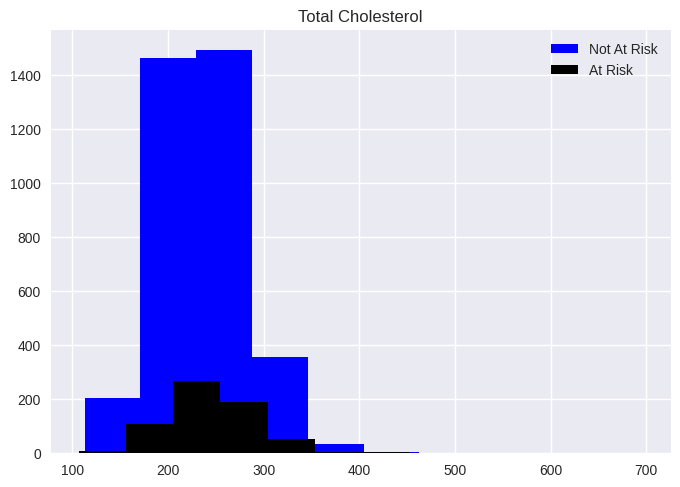

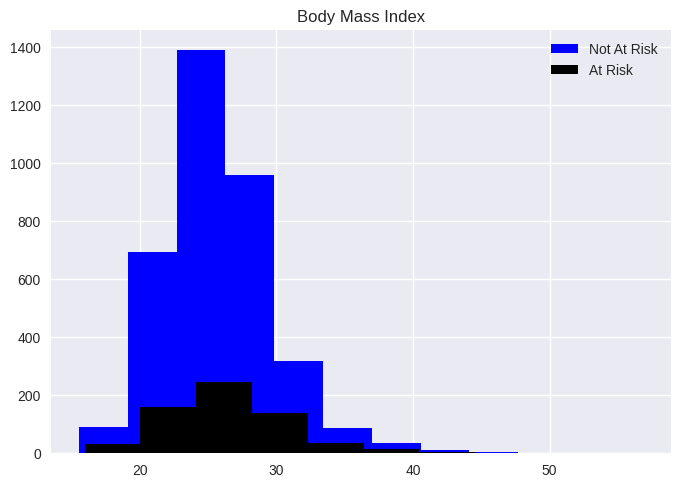

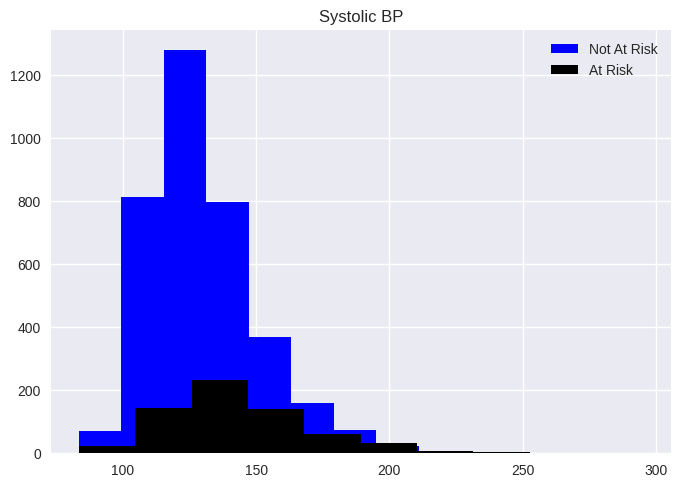

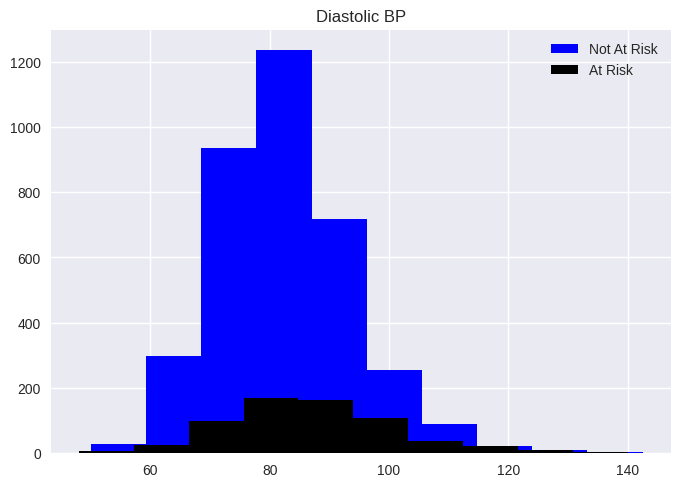

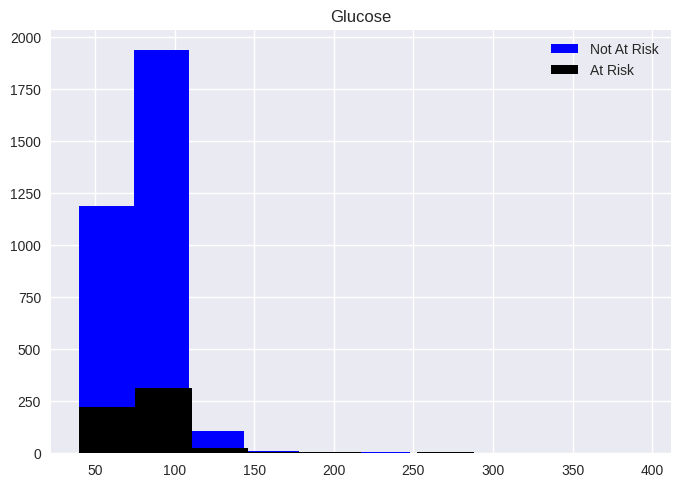

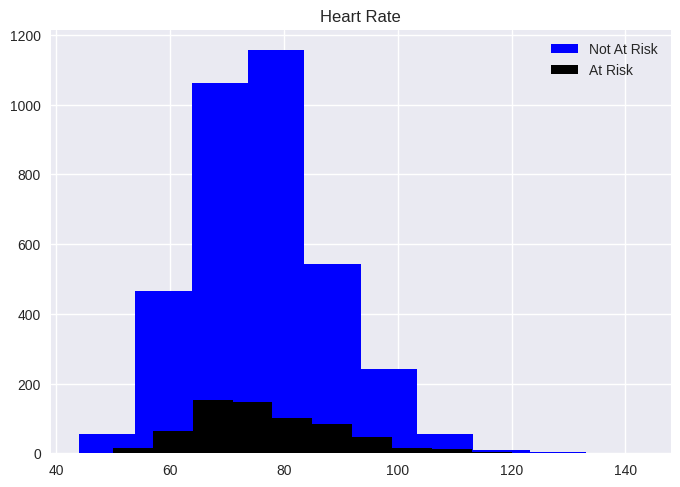

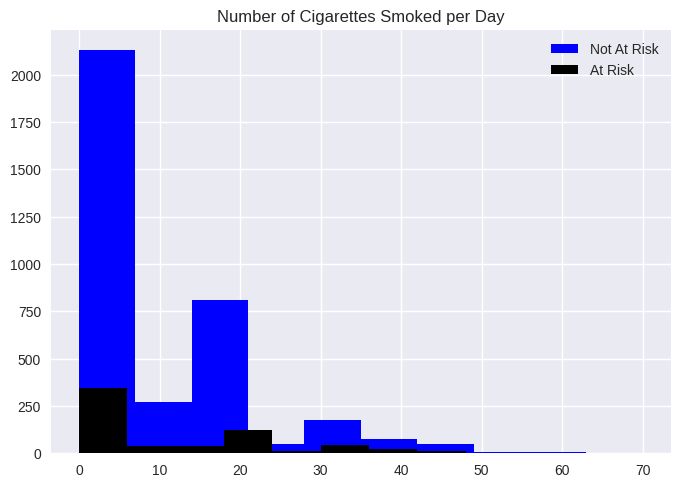

In [ ]:
cols = ['totChol', 'BMI', 'sysBP', 'diaBP', 'glucose', 'heartRate', 'cigsPerDay']
titles = ['Total Cholesterol', 'Body Mass Index', 'Systolic BP', 'Diastolic BP',
'Glucose', 'Heart Rate', 'Number of Cigarettes Smoked per Day']
def plot_hist(no_frame, yes_frame, col_list, title_list):
  for x in range(len(col_list)):
    plt.figure()
    plt.hist(no_frame[col_list[x]], color='Blue', label='Not At Risk')
    plt.hist(yes_frame[col_list[x]], color='Black', label='At Risk')
    plt.title(title_list[x])
    plt.legend()
  plt.show()

plot_hist(chd_no, chd_yes, cols, titles)

# Exercise 2 - Demographic Factors

In [ ]:
def percent_calc(frame, col):
  total_vals = len(frame[col])
  count_dict = {}
  for code in frame[col]:
    count_dict.update({code:0})
  keys = list(count_dict.keys())
  for code in frame[col]:
    for i in range(len(keys)):
      if keys[i] == code:
        count_dict.update({code:count_dict.get(code)+1})
  counts = count_dict.values()
  for x in counts:
    percent = x/total_vals
    percent = round(percent*100, 1)
    print(percent)
  return list(counts)

percent_calc(hrt_df, 'TenYearCHD')

84.8
15.2


[3596, 644]

## Men and Women %'s



In [ ]:
women = []
men = []
for x in range(len(hrt_df)):
  if hrt_df['male'][x] == 0:
    women.append(x)
  else:
    men.append(x)

men_df = hrt_df.drop(women)
women_df = hrt_df.drop(men)

In [ ]:
print('Men')
print(percent_calc(men_df, 'TenYearCHD'))
print()
print('Women')
print(percent_calc(women_df, 'TenYearCHD'))

Men
81.2
18.8
[1477, 343]

Women
87.6
12.4
[2119, 301]


## Age %'s

In [ ]:
above_45 = []
below_45 = []
for x in range(len(hrt_df)):
  if hrt_df['age'][x] <= 45:
    below_45.append(x)
  else:
    above_45.append(x)

above_df = hrt_df.drop(below_45)
below_df = hrt_df.drop(above_45)

In [ ]:
print('Above 45')
print(percent_calc(above_df, 'TenYearCHD'))
print()
print('Below 45')
print(percent_calc(below_df, 'TenYearCHD'))

Above 45
79.7
20.3
[2113, 538]

Below 45
93.3
6.7
[1483, 106]


## Education Level %'s

In [ ]:
def levels_split(frame, col, value):
  ed_list = []
  for x in range(len(frame)):
    if frame[col][x] != value:
      ed_list.append(x)
  new_frame = frame.drop(ed_list)
  return new_frame

ed_1 = levels_split(hrt_df, 'education', 1)
ed_2 = levels_split(hrt_df, 'education', 2)
ed_3 = levels_split(hrt_df, 'education', 3)
ed_4 = levels_split(hrt_df, 'education', 4)

In [ ]:
print('Education 1')
print(percent_calc(ed_1, 'TenYearCHD'))
print()
print('Education 2')
print(percent_calc(ed_2, 'TenYearCHD'))
print()
print('Education 3')
print(percent_calc(ed_3, 'TenYearCHD'))
print()
print('Education 4')
print(percent_calc(ed_4, 'TenYearCHD'))

Education 1
81.2
18.8
[1397, 323]

Education 2
88.3
11.7
[1106, 147]

Education 3
12.8
87.2
[88, 601]

Education 4
85.2
14.8
[403, 70]


# Heart Study Pt 2